# Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df_buoy = pd.read_csv('buoy_data_cleaned.csv', index_col='date')
df_buoy

,51000_WDIR_mean,51000_WDIR_std,51000_WSPD_mean,51000_WSPD_std,51000_GST_mean,51000_GST_std,51000_WVHT_mean,51000_WVHT_std,51000_DPD_mean,51000_DPD_std,...,kwhh1_WSPD_mean,kwhh1_WSPD_std,kwhh1_GST_mean,kwhh1_GST_std,kwhh1_PRES_mean,kwhh1_PRES_std,kwhh1_ATMP_mean,kwhh1_ATMP_std,kwhh1_WTMP_mean,kwhh1_WTMP_std
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,280.250000,24.152145,6.100000,2.707638,7.916667,3.014410,2.992917,0.249686,13.715000,0.774967,...,1.712712,0.922628,2.358051,0.993671,1016.870293,0.952659,23.935565,1.815118,26.214644,0.116654
2016-01-02,105.708333,145.625631,7.212500,2.420620,9.195833,2.783098,3.880000,0.385374,13.942500,0.975675,...,2.609283,1.600926,4.062447,2.539598,1016.563750,1.680051,24.730000,1.885004,25.969167,0.216204
2016-01-03,192.291667,141.821835,1.950000,0.882191,3.491667,1.072955,3.693750,0.292513,13.747500,0.719542,...,1.667511,1.181854,2.467932,1.308733,1018.078333,1.161314,23.809167,1.776744,25.834167,0.111660
2016-01-04,176.875000,137.028183,5.454167,2.494163,7.204167,2.600415,3.592917,0.666852,14.795000,1.853291,...,2.319831,1.071900,3.168354,1.148678,1018.136250,1.031582,23.264167,1.980461,25.762500,0.100678
2016-01-05,76.000000,11.583688,6.925000,1.324764,8.845833,1.582782,3.874583,0.359541,14.728333,1.188172,...,2.859072,1.708767,4.258228,2.028334,1017.990417,0.934571,23.658333,1.628978,25.677083,0.141775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27,121.787234,11.239477,7.746853,0.981362,9.982517,1.171812,2.220000,0.124586,10.051915,0.558946,...,2.061667,0.867757,2.804167,0.923464,1015.892857,0.960085,24.316807,0.999014,25.907983,0.343934
2023-03-28,123.715278,5.617982,7.802083,1.031563,9.909722,1.246495,2.081250,0.100734,9.916875,0.495392,...,2.189362,1.115247,2.912766,1.177353,1014.446610,0.962946,24.481974,0.869959,26.064167,0.275285
2023-03-29,122.513889,7.630438,8.913889,0.931696,11.351389,1.174495,2.308333,0.169772,8.566667,1.322250,...,1.868966,0.848315,2.650862,0.945529,1013.653333,0.922788,24.765517,0.598353,25.916596,0.191767


In [3]:
df_weather = pd.read_csv('weather_station_features_cleaned.csv')
df_snorkel_ratings = pd.read_csv('cleaned_snorkel_dataset.csv', index_col='date')

In [4]:
df_weather = df_weather.set_index('Unnamed: 0')

In [5]:

df_weather.index = pd.to_datetime(df_weather.index)
df_snorkel_ratings.index = pd.to_datetime(df_snorkel_ratings.index)
df_buoy.index = pd.to_datetime(df_buoy.index)

In [6]:
#df = df_snorkel_ratings.join([df_weather, df_buoy], how='inner')
df = df_snorkel_ratings.join([df_buoy,df_weather], how='inner')

In [7]:
df[:5]

,south_rating,kaanapali_rating,northwest_rating,51000_WDIR_mean,51000_WDIR_std,51000_WSPD_mean,51000_WSPD_std,51000_GST_mean,51000_GST_std,51000_WVHT_mean,...,USW00022516_TMIN,USW00022516_TAVG,USW00022516_WSF2,USW00022516_WSF5,USW00022516_WDF2,USW00022516_AWND,USW00022516_WDF5,USW00022516_WT01,USW00022516_WT08,USW00022516_WT03
2016-06-04,3.0,4.0,7.0,306.304348,16.693588,3.230435,1.284323,4.230435,1.358286,1.193478,...,68.0,75,14.1,19.9,20.0,5.59,30.0,1,0,0
2016-06-13,2.0,3.0,7.0,83.541667,7.306811,9.554167,0.906009,11.745833,1.193088,2.501667,...,74.0,80,31.1,42.9,70.0,18.34,70.0,0,1,0
2016-06-15,4.0,4.0,7.0,78.434783,4.076831,10.026087,0.578570,12.078261,0.692792,3.206957,...,74.0,78,32.0,44.1,60.0,17.45,60.0,0,0,0
2016-06-16,4.0,4.0,7.0,68.125000,5.589684,9.379167,0.600709,11.400000,0.627625,2.837917,...,72.0,78,31.1,40.0,50.0,15.88,50.0,1,0,0
2016-06-17,6.0,8.0,7.0,54.347826,9.207747,8.604348,1.186852,10.634783,1.301261,2.376957,...,72.0,77,29.1,36.0,40.0,15.88,40.0,1,0,0


# Linear Regression 

In [9]:
from sklearn.preprocessing import StandardScaler

s_y = df['south_rating'] 
k_y = df['kaanapali_rating']
nw_y = df['northwest_rating']
df_x = df.drop(['south_rating','kaanapali_rating', 'northwest_rating'], axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [107]:
from sklearn.model_selection import train_test_split

X_s_train, X_s_valid, y_s_train, y_s_valid = train_test_split(df_x, s_y, train_size=0.2)
X_k_train, X_k_valid, y_k_train, y_k_valid = train_test_split(df_x, k_y, train_size=0.2)
X_nw_train, X_nw_valid, y_nw_train, y_nw_valid = train_test_split(df_x, nw_y, train_size=0.2)

In [219]:
s_lin_model = LinearRegression()
s_lin_model.fit(X_s_train, y_s_train)
print(s_lin_model.score(X_s_valid, y_s_valid))
print(s_lin_model.score(X_s_train, y_s_train))

-0.024984139005835404
0.6609953127390414


In [220]:
k_lin_model = LinearRegression()
k_lin_model.fit(X_k_train, y_k_train)
print(k_lin_model.score(X_k_valid, y_k_valid))
print(k_lin_model.score(X_k_train, y_k_train))

-0.06360254250772046
0.7056700206558902


In [221]:
nw_lin_model = LinearRegression()
nw_lin_model.fit(X_nw_train, y_nw_train)
print(nw_lin_model.score(X_nw_valid, y_nw_valid))
print(nw_lin_model.score(X_nw_train, y_nw_train))

0.445802875937096
0.7412072150938871


In [162]:
nw_scaled_lin_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', LinearRegression())
])
nw_scaled_lin_model.fit(X_nw_train, y_nw_train)


Pipeline(steps=[('scale', StandardScaler()), ('fit', LinearRegression())])

In [169]:
with pd.option_context('display.max_rows', None):
    display(pd.Series(data = np.abs(nw_scaled_lin_model[1].coef_), index= X_nw_train.columns).sort_values(ascending=False))

51001_WSPD_mean     6.924021
51001_GST_mean      6.906335
51000_GST_mean      4.231624
51000_WSPD_mean     4.100070
51101_GST_mean      3.118476
51101_WSPD_mean     2.853173
51101_GST_std       1.576182
kwhh1_GST_mean      1.436988
51101_WSPD_std      1.392651
51003_GST_mean      1.376323
51003_WSPD_mean     1.223598
kwhh1_WSPD_mean     1.075303
51001_APD_mean      1.007386
kwhh1_GST_std       0.969357
51002_WSPD_std      0.784369
51002_GST_std       0.726277
kwhh1_WSPD_std      0.648843
51004_PRES_mean     0.588977
51002_PRES_mean     0.582830
51002_WVHT_mean     0.567120
klih1_GST_mean      0.498409
51101_DPD_mean      0.486458
51101_APD_mean      0.474283
51101_PRES_mean     0.457004
51002_DPD_mean      0.448102
51004_WSPD_std      0.436475
USW00022516_TMIN    0.425461
51101_APD_std       0.416863
klih1_WSPD_mean     0.414676
51004_GST_mean      0.406064
51101_WVHT_mean     0.401666
51000_PRES_mean     0.400002
51000_APD_mean      0.394722
51001_DPD_mean      0.378537
51004_GST_std 

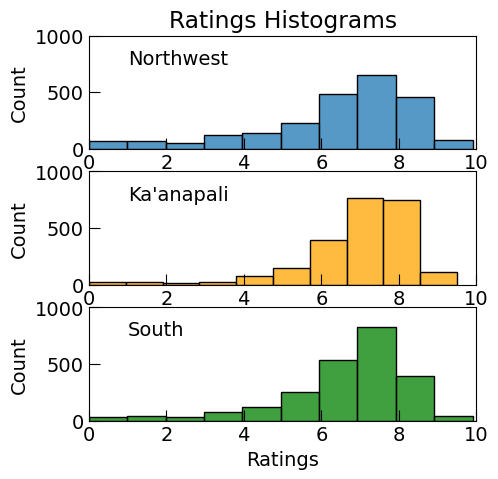

In [36]:
fig, axes = plt.subplots(3)

sns.histplot(nw_y, bins=10, ax=axes[0]);
sns.histplot(k_y, bins=10, ax=axes[1], color='orange')
sns.histplot(s_y, bins=10, ax=axes[2], color='green')
axes[0].set_ylim(0,1000)
axes[1].set_ylim(0,1000)
axes[2].set_ylim(0,1000)
axes[0].set_title('Ratings Histograms')
axes[0].text(1,750, 'Northwest')
axes[1].text(1,750, "Ka'anapali")
axes[2].text(1,750, 'South')
axes[2].set_xlabel('Ratings');

In [17]:
plt.style.use("/Users/jkharada/software/jayehat.mplstyle")

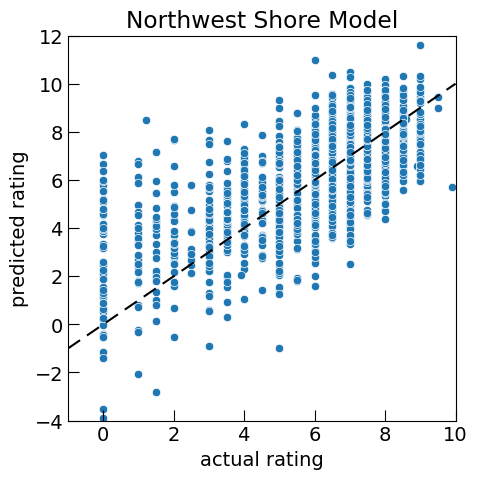

In [279]:
sns.scatterplot(x=y_nw_valid, y=nw_lin_model.predict(X_nw_valid));
sns.lineplot(x=[-1, 10], y=[-1,10],color='black', dashes=(7,4))
plt.ylabel('predicted rating')
plt.xlabel('actual rating')
plt.title('Northwest Shore Model')
plt.xlim(-1,10);
plt.savefig('prelim_nw_lin_model.png')

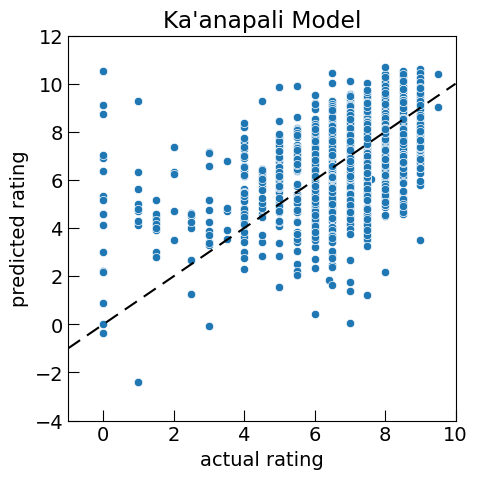

In [280]:
sns.lineplot(x=[-1,10], y=[-1,10], color='black', dashes=(7,4))
sns.scatterplot(x=y_k_valid, y=k_lin_model.predict(X_k_valid));
plt.ylabel('predicted rating');
plt.xlabel('actual rating')
plt.title("Ka'anapali Model");
plt.xlim(-1,10);
plt.savefig('prelim_k_lin_model.png')

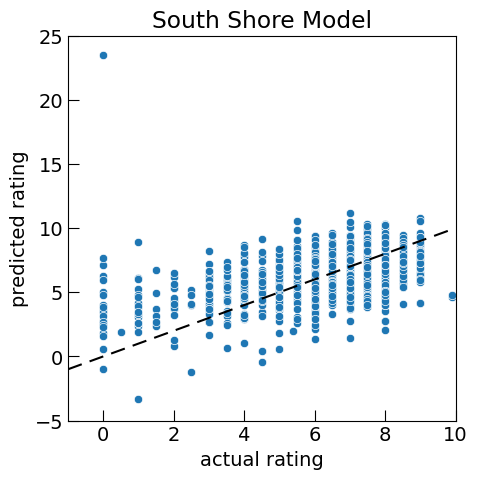

In [281]:
sns.scatterplot(x=y_s_valid, y=s_lin_model.predict(X_s_valid));
sns.lineplot(x=[-1,10], y=[-1,10], color='black', dashes=(7,4))
plt.ylabel('predicted rating')
plt.xlabel('actual rating')
plt.title('South Shore Model');
plt.xlim(-1,10)
plt.savefig('prelim_s_lin_model.png')

In [118]:
## Ridge model 
from sklearn.linear_model import RidgeCV

nw_scaled_ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', RidgeCV(alphas=[150,200, 250, 300, 400], n_splits))
])
nw_scaled_ridge_model.fit(X_nw_train, y_nw_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('fit', RidgeCV(alphas=[150, 200, 250, 300, 400]))])

In [119]:
print(nw_scaled_ridge_model.score(X_nw_train, y_nw_train))
print(nw_scaled_ridge_model.score(X_nw_valid, y_nw_valid))

0.6313377424356152
0.5398407682603454


In [120]:
nw_scaled_ridge_model[1].alpha_

250

In [127]:
## Ridge model with filtered data
from sklearn.linear_model import RidgeCV

nw_scaled_ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', RidgeCV(alphas=[0.008,0.009, 0.01, 0.02, 0.03]))
])
nw_scaled_ridge_model.fit(X_nw_filt_train, y_nw_filt_train)

print(nw_scaled_ridge_model.score(X_nw_filt_train, y_nw_filt_train))
print(nw_scaled_ridge_model.score(X_nw_filt_valid, y_nw_filt_valid))

nw_scaled_ridge_model[1].alpha_

0.6631779161816269
0.557576199231779


0.02

# XGBoost testing

In [13]:
import xgboost as xgb

In [136]:
nw_xgb_model = xgb.XGBRegressor(n_jobs=2, max_depth=4, n_estimators=300, reg_lambda=120, reg_alpha=8)

In [129]:

from sklearn.model_selection import GridSearchCV
nw_xgb_cv = GridSearchCV(nw_xgb_model, {'max_depth': [4],
                                      'n_estimators': [300],
                                        'lambda': [100, 110, 120, 130, 140],
                                        'alpha': [6, 8, 10]
                                       },
                          verbose=1,
                          n_jobs=2)



In [130]:
nw_xgb_cv.fit(X_nw_prev_train, y_nw_prev_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=300,
                                    n_jobs=2, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=2,
             param_grid={'alpha': [6, 8, 10],
                         'lambda': [100, 110, 120, 130, 140], 'max_depth': [4],
                         'n_estimators': [300]},
             verbose=1)

In [131]:
print(nw_xgb_cv.best_score_)
print(nw_xgb_cv.best_params_)

0.5184152354445113
{'alpha': 8, 'lambda': 120, 'max_depth': 4, 'n_estimators': 300}


In [137]:
nw_xgb_model.fit(X_nw_prev_train, y_nw_prev_train)
print(nw_xgb_model.score(X_nw_prev_train, y_nw_prev_train))
print(nw_xgb_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.9629859785177163
0.581407355733357


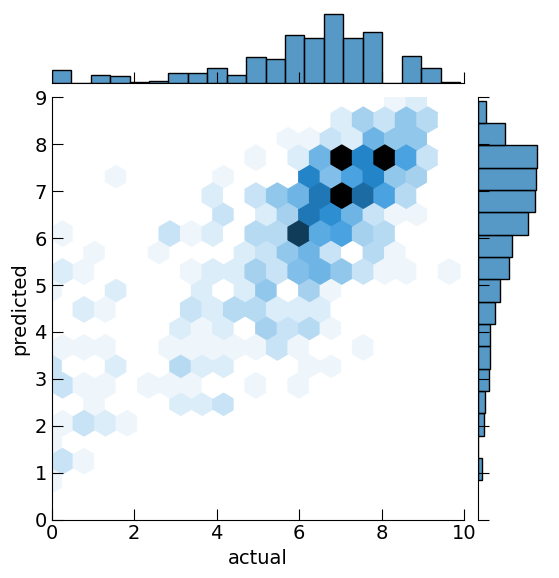

In [138]:
df_xgb_results = y_nw_prev_valid.to_frame(name='actual')
df_xgb_results['predicted'] = nw_xgb_model.predict(X_nw_prev_valid)

sns.jointplot(data=df_xgb_results, x='actual', y='predicted', kind='hex')
plt.xlim(0,10);

Text(33.08333333333333, 0.5, 'Predicted')

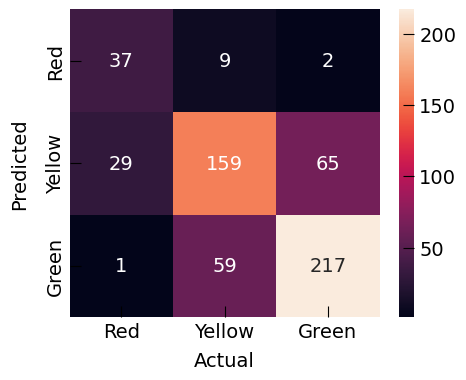

In [139]:
df_xgb_results['label'] = df_xgb_results.apply(lambda x: results(x), axis=1)
  
results_matrix = [[len(df_xgb_results.query("label == 'RR'")), len(df_xgb_results.query("label == 'YR'")), len(df_xgb_results.query("label == 'GR'"))],
                 [len(df_xgb_results.query("label == 'RY'")), len(df_xgb_results.query("label == 'YY'")), len(df_xgb_results.query("label == 'GY'"))],
                 [len(df_xgb_results.query("label == 'RG'")),len(df_xgb_results.query("label == 'YG'")), len(df_xgb_results.query("label == 'GG'"))]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='d', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Red', 'Yellow', 'Green'])

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12)

In [102]:
X_nw_filt_train, X_nw_filt_valid, y_nw_filt_train, y_nw_filt_valid = train_test_split(df_x_filtered, nw_y, test_size=0.2)

nw_xgb_model.fit(X_nw_filt_train, y_nw_filt_train)
print(nw_xgb_model.score(X_nw_filt_train, y_nw_filt_train))
print(nw_xgb_model.score(X_nw_filt_valid, y_nw_filt_valid))

0.7563762065675509
0.5587225783681796


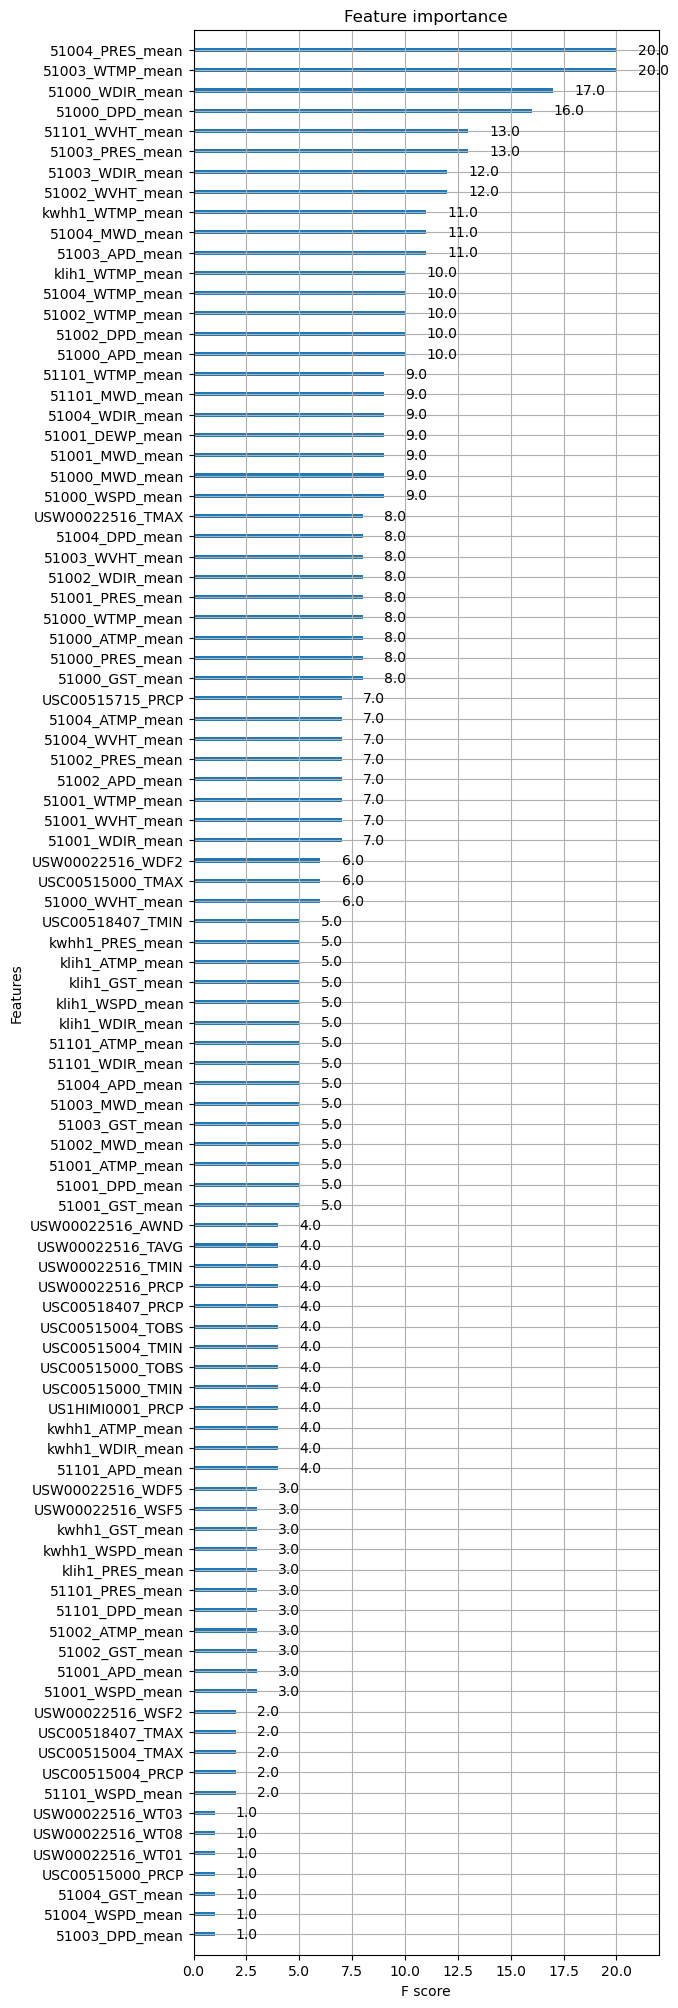

In [88]:
fig, ax = plt.subplots(figsize=(6,25))

xgb.plot_importance(nw_xgb_model, ax=ax);

In [52]:
xgb_model.score(X_s_valid, y_s_valid)

0.2898418057131745

Remove std devs from the features

In [70]:
df_x_filtered = df_x[[col for col in df_x.columns if 'std' not in col]]

In [93]:
s_xgb_model = xgb.XGBRegressor(n_jobs=2, max_depth=2, n_estimators=50)

X_s_filt_train, X_s_filt_valid, y_s_filt_train, y_s_filt_valid = train_test_split(df_x_filtered, s_y, test_size=0.2)

s_xgb_model.fit(X_s_filt_train, y_s_filt_train)
print(s_xgb_model.score(X_s_filt_train, y_s_filt_train))
print(s_xgb_model.score(X_s_filt_valid, y_s_filt_valid))

0.6264248637177352
0.41525690249511793


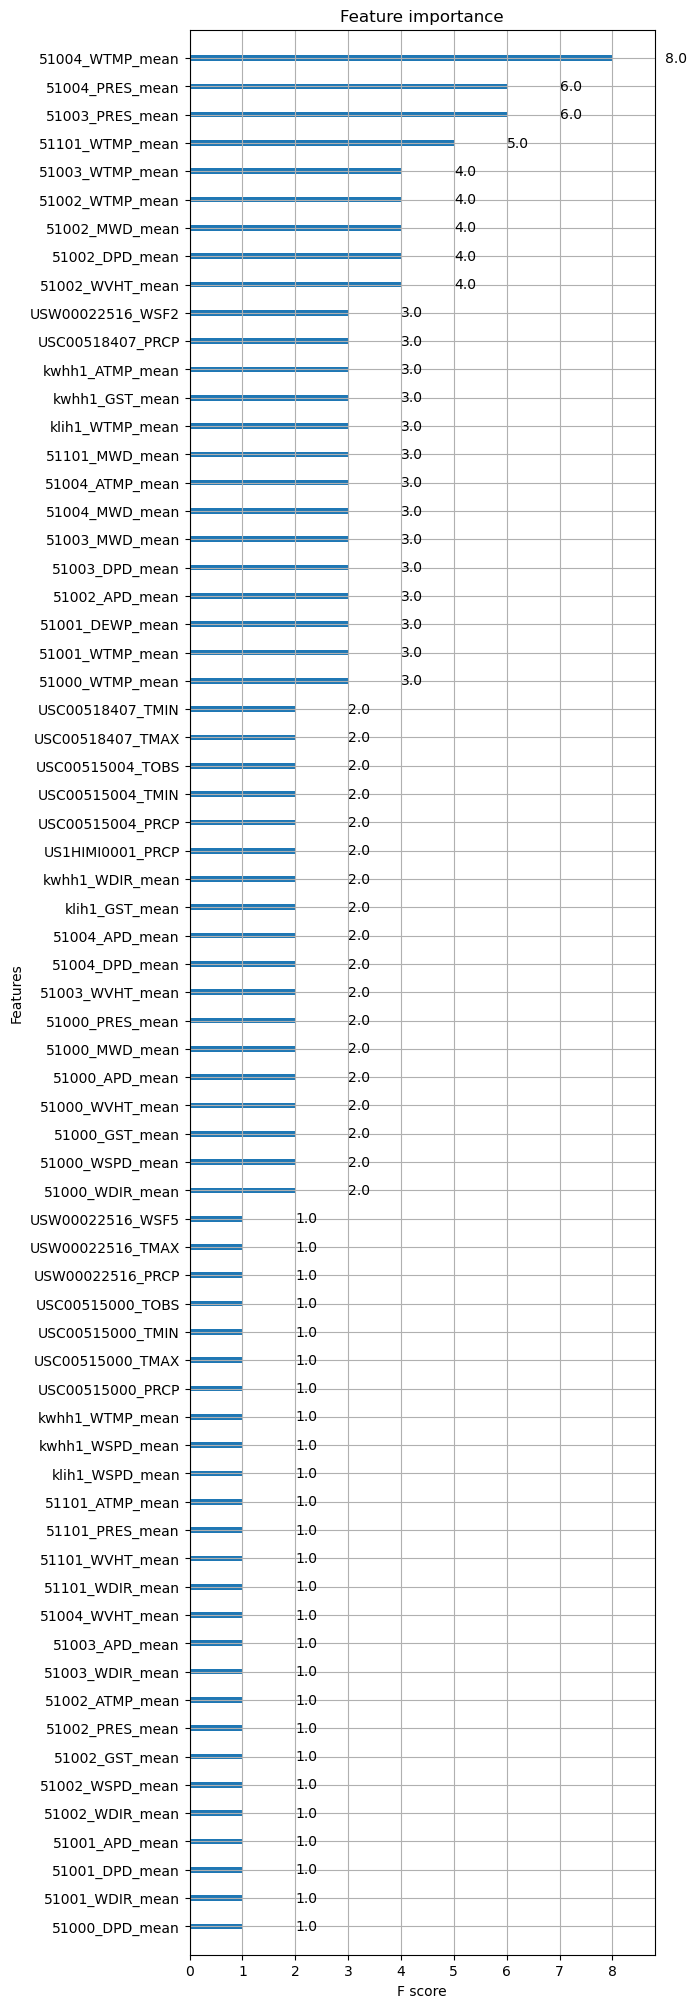

In [90]:
fig, ax = plt.subplots(figsize=(6,25))

xgb.plot_importance(s_xgb_model, ax=ax);

# Predicting scores based on previous day's data

In [11]:
"""
In order to properly increment data (ie using previous day's data for tomorrow's score)
we must increment the feature's index by one day and join it with the nw_y data again.
""" 
df_x_filtered = df_x[[col for col in df_x.columns if 'std' not in col]]
df_prev_day = df_x_filtered
df_prev_day.index = df_x_filtered.index + pd.Timedelta(days=1)
df_temp = nw_y.to_frame().join([df_prev_day], how='inner')
y_nw_prev_day = df_temp['northwest_rating']
df_prev_day_feat = df_temp.drop('northwest_rating', axis=1)

In [99]:
from sklearn.model_selection import train_test_split

X_nw_prev_train, X_nw_prev_valid, y_nw_prev_train, y_nw_prev_valid = train_test_split(df_prev_day_feat, y_nw_prev_day)

In [13]:
## Ridge model with filtered data
from sklearn.linear_model import RidgeCV

nw_scaled_ridge_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', RidgeCV(alphas=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1]))
])

In [14]:
nw_scaled_ridge_model.fit(X_nw_prev_train, y_nw_prev_train)
print(nw_scaled_ridge_model.score(X_nw_prev_train, y_nw_prev_train))
print(nw_scaled_ridge_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.5299728643867399
0.5342602189050558


In [15]:
nw_scaled_ridge_model.predict(X_nw_prev_valid)
type(y_nw_prev_valid)

pandas.core.series.Series

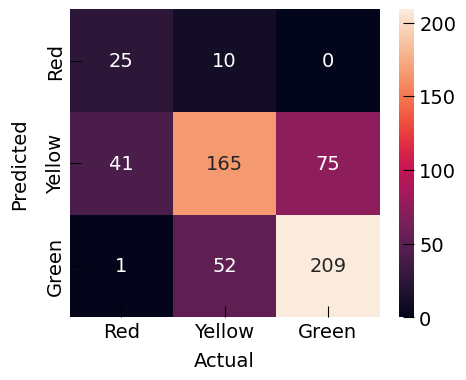

In [104]:
## Generate confusion matrix
## Red = 0-3.5, yellow = 4.0-6.5, green = 7.0 - 10

nw_scaled_ridge_model.fit(X_nw_prev_train, y_nw_prev_train)
df_ridge_results = y_nw_prev_valid.to_frame(name='actual')
df_ridge_results['predicted'] = nw_scaled_ridge_model.predict(X_nw_prev_valid)

def results(x):
    if x.actual <= 3.5:
        if x.predicted <= 3.5:
            return 'RR'
        elif 6.66 < x.predicted:
            return 'RG'
        else:
            return 'RY'
    
    elif 6.66 < x.actual:
        if x.predicted <= 3.5:
            return 'GR'
        elif 6.66 < x.predicted:
            return 'GG'
        else:
            return 'GY'
        
    else:
        if x.predicted <= 3.5:
            return 'YR'
        elif 6.66 < x.predicted:
            return 'YG'
        else:
            return 'YY'
        
df_ridge_results['label'] = df_ridge_results.apply(lambda x: results(x), axis=1)
  
results_matrix = [[len(df_ridge_results.query("label == 'RR'")), len(df_ridge_results.query("label == 'YR'")), len(df_ridge_results.query("label == 'GR'"))],
                 [len(df_ridge_results.query("label == 'RY'")), len(df_ridge_results.query("label == 'YY'")), len(df_ridge_results.query("label == 'GY'"))],
                 [len(df_ridge_results.query("label == 'RG'")),len(df_ridge_results.query("label == 'YG'")), len(df_ridge_results.query("label == 'GG'"))]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='d', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Red', 'Yellow', 'Green'])

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12)
#ax.set(xlabel='Actual', ylabel='Predicted')
plt.savefig('pseudo_confusion_matrix_error_NW_model.png', dpi=300)

In [27]:
plt.style.use("/Users/jkharada/software/jayehat.mplstyle")

In [25]:
with pd.option_context('display.max_rows', None):
    display(df_results.query("label == 'GY'"))

,actual,predicted,label
2021-05-03,7.0,5.824226,GY
2016-12-29,7.0,6.350237,GY
2022-06-21,7.5,6.446363,GY
2023-02-20,7.0,5.700911,GY
2016-12-12,7.0,4.809557,GY
2022-03-28,7.0,5.862203,GY
2016-10-25,7.0,6.547379,GY
2018-11-20,7.0,5.935367,GY
2016-10-31,7.0,5.492685,GY
2021-09-13,7.5,6.093839,GY


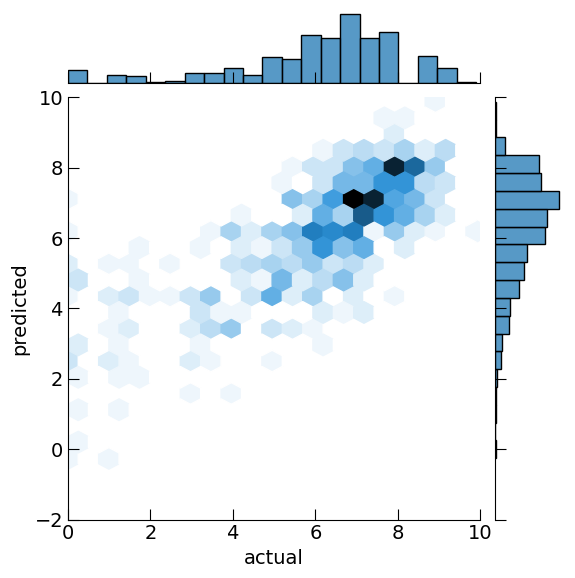

In [161]:
# Hexplot showing error
sns.jointplot(data=df_results, x='actual', y='predicted', kind='hex')
plt.xlim(0,10);
plt.savefig('Hexbins_error_NW_model_ridge.png', dpi=300)

In [55]:
from sklearn.preprocessing import PolynomialFeatures

nw_scaled_poly_ridge_model = Pipeline([
    ('polynomials', PolynomialFeatures()),
    ('scale', StandardScaler()),
    ('fit', RidgeCV(alphas=[400, 450, 500, 550, 600,]))
])

In [73]:
# Model doesn't perform significantly better than linear regression

nw_scaled_poly_ridge_model.fit(X_nw_prev_train, y_nw_prev_train)
print(nw_scaled_poly_ridge_model.score(X_nw_prev_train, y_nw_prev_train))
print(nw_scaled_poly_ridge_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.6379063166827765
0.4366597345365928


Model doesn't perform significantly better with polynomial patterns than linear regression

<AxesSubplot: xlabel='northwest_rating', ylabel='Count'>

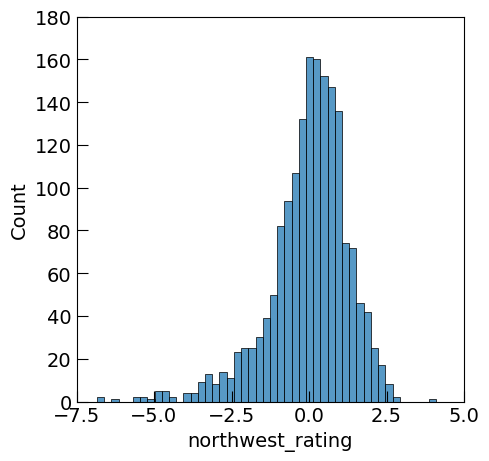

In [80]:
## Fit residuals

residuals = y_nw_prev_train - nw_scaled_poly_ridge_model.predict(X_nw_prev_train)


Fit residuals with nonlinear model 

In [90]:
import xgboost as xgb

nw_xgb_residual_model = xgb.XGBRegressor(n_jobs=2, max_depth=2, n_estimators=25)

from sklearn.model_selection import GridSearchCV
nw_xgb_cv = GridSearchCV(nw_xgb_residual_model, {'max_depth': [2, 4, 6],
                                      'n_estimators': [10, 25, 50, 75]},
                          verbose=1,
                          n_jobs=2)

In [86]:
nw_xgb_cv.fit(residuals, y_nw_prev_train)
print(nw_xgb_cv.best_score_)
print(nw_xgb_cv.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.4921507937521694
{'max_depth': 2, 'n_estimators': 25}


In [96]:
from sklearn.base import BaseEstimator, RegressorMixin

class FitResiduals(BaseEstimator, RegressorMixin):
    def __init__(self, sub_predictor, res_predictor):
        self.sub_predictor = sub_predictor
        self.res_predictor = res_predictor
        
    def fit(self, X, y):
        self.sub_predictor.fit(X, y)
        residual = y - self.sub_predictor.predict(X)
        self.res_predictor.fit(X, residual)
        return self
    
    def predict(self, X):
        residuals = self.res_predictor.predict(X)
        return self.sub_predictor.predict(X) + residuals


In [97]:
residual_model = Pipeline([
    ('scale', StandardScaler()),
    ('fit', FitResiduals(RidgeCV(alphas=np.linspace(0.1,1,10)), nw_xgb_residual_model))
])

In [101]:
residual_model.fit(X_nw_prev_train, y_nw_prev_train)
print(residual_model.score(X_nw_prev_train, y_nw_prev_train))
print(residual_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.6327026729280527
0.5598429125216798


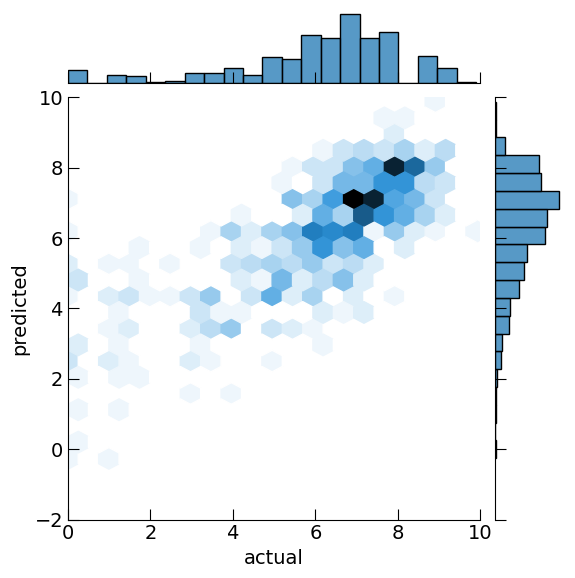

In [102]:
df_results = y_nw_prev_valid.to_frame(name='actual')
df_results['predicted'] = residual_model.predict(X_nw_prev_valid)

sns.jointplot(data=df_results, x='actual', y='predicted', kind='hex')
plt.xlim(0,10);

Text(33.08333333333333, 0.5, 'Predicted')

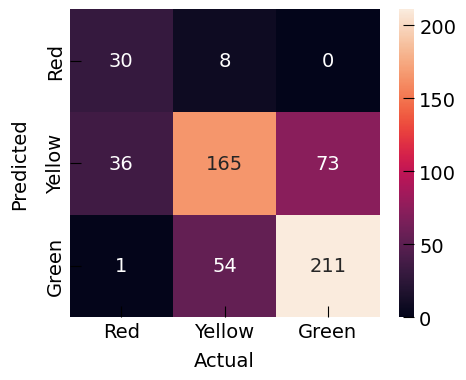

In [103]:
df_results['label'] = df_results.apply(lambda x: results(x), axis=1)
  
results_matrix = [[len(df_results.query("label == 'RR'")), len(df_results.query("label == 'YR'")), len(df_results.query("label == 'GR'"))],
                 [len(df_results.query("label == 'RY'")), len(df_results.query("label == 'YY'")), len(df_results.query("label == 'GY'"))],
                 [len(df_results.query("label == 'RG'")),len(df_results.query("label == 'YG'")), len(df_results.query("label == 'GG'"))]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='d', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Red', 'Yellow', 'Green'])

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12)

# Lasso model

In [76]:
# Lasso model
from sklearn.linear_model import LassoCV

nw_lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(max_iter=10_000))
])

nw_lasso_model.fit(X_nw_prev_train, y_nw_prev_train)
print(nw_lasso_model.score(X_nw_prev_train, y_nw_prev_train))
print(nw_lasso_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.5569403457135027
0.4459151575006184


In [77]:
nw_lasso_model[1].alpha_

0.001111784939009951

# Average models

In [146]:
from sklearn.pipeline import FeatureUnion
from sklearn.base import TransformerMixin

class ModelTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, model):
        # What needs to be done here?
        self.model = model
    
    def fit(self, X, y):
        # Fit the stored predictor.
        # Question: what should be returned?
        self.model.fit(X,y)
        return self
    
    def transform(self, X):
        # Use predict on the stored predictor as a "transformation".
        # Be sure to return a 2-D array.
        transformation = self.model.predict(X)
        return [ [pred] for pred in transformation ]

nw_ridge_trans = ModelTransformer(nw_scaled_ridge_model)
nw_xgb_trans = ModelTransformer(nw_xgb_model)
nw_residual_trans = ModelTransformer(nw_xgb_residual_model)

union = FeatureUnion([
    ('ridge', nw_ridge_trans),
#    ('xgb', nw_xgb_trans),
    ('residuals', nw_residual_trans)
])
full_model = Pipeline([
    ('get_fits', union),
    ('lin_regression', RidgeCV(alphas=[0.1, 1, 10, 100, 400]))
])

In [147]:
full_model.fit(X_nw_prev_train, y_nw_prev_train)

Pipeline(steps=[('get_fits',
                 FeatureUnion(transformer_list=[('ridge',
                                                 ModelTransformer(model=Pipeline(steps=[('scale',
                                                                                         StandardScaler()),
                                                                                        ('fit',
                                                                                         RidgeCV(alphas=[0.01,
                                                                                                         0.02,
                                                                                                         0.03,
                                                                                                         0.04,
                                                                                                         0.05,
                                                                                                         0.06,
                                                                                                         0.07,
                                                                                                         0.08,
                                                                                                         0.1]))]))),
                                                ('residuals',
                                                 ModelTransformer(model=XGBRegressor(base_score=None,
                                                                                     booster=None,
                                                                                     callbacks=None,
                                                                                     colsample_bylevel=None,
                                                                                     colsample_bynode=None,
                                                                                     cols...
                                                                                     interaction_constraints=None,
                                                                                     learning_rate=None,
                                                                                     max_bin=None,
                                                                                     max_cat_threshold=None,
                                                                                     max_cat_to_onehot=None,
                                                                                     max_delta_step=None,
                                                                                     max_depth=2,
                                                                                     max_leaves=None,
                                                                                     min_child_weight=None,
                                                                                     missing=nan,
                                                                                     monotone_constraints=None,
                                                                                     n_estimators=25,
                                                                                     n_jobs=2,
                                                                                     num_parallel_tree=None,
                                                                                     predictor=None,
                                                                                     random_state=None, ...)))])),
                ('lin_regression', RidgeCV(alphas=[0.1, 1, 10, 100, 400]))])

In [148]:
print(full_model.score(X_nw_prev_train, y_nw_prev_train))
print(full_model.score(X_nw_prev_valid, y_nw_prev_valid))

0.6084924682803554
0.5359121180416369


(0.0, 10.0)

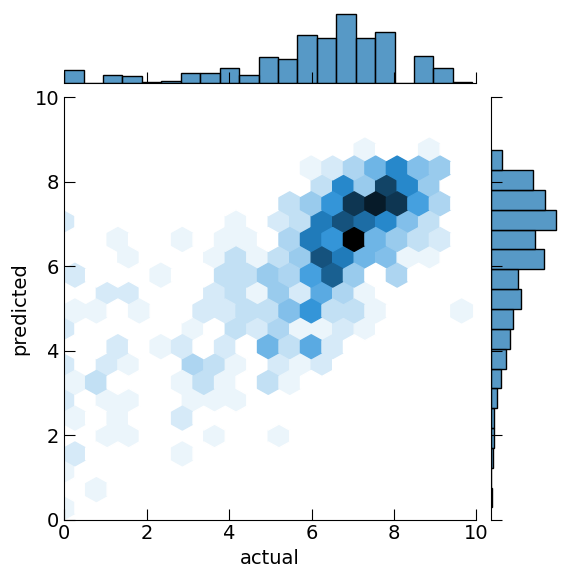

In [159]:
df_ensem_results = y_nw_prev_valid.to_frame(name='actual')
df_ensem_results['predicted'] = full_model.predict(X_nw_prev_valid)

sns.jointplot(data=df_ensem_results, x='actual', y='predicted', kind='hex')
plt.xlim(0,10);
plt.ylim(0,10);
plt.save()

Text(33.08333333333333, 0.5, 'Predicted')

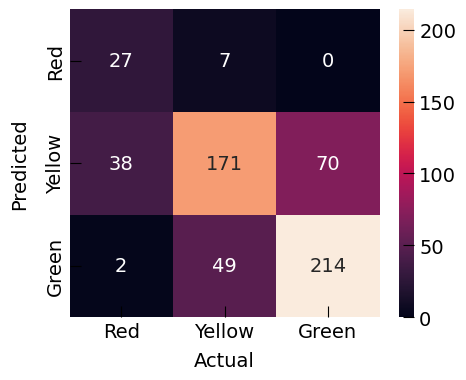

In [155]:
df_ensem_results['label'] = df_ensem_results.apply(lambda x: results(x), axis=1)
  
results_matrix = [[len(df_ensem_results.query("label == 'RR'")), len(df_ensem_results.query("label == 'YR'")), len(df_ensem_results.query("label == 'GR'"))],
                 [len(df_ensem_results.query("label == 'RY'")), len(df_ensem_results.query("label == 'YY'")), len(df_ensem_results.query("label == 'GY'"))],
                 [len(df_ensem_results.query("label == 'RG'")),len(df_ensem_results.query("label == 'YG'")), len(df_ensem_results.query("label == 'GG'"))]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='d', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Red', 'Yellow', 'Green'])

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12)


In [164]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor([
    ('ridge', nw_scaled_ridge_model),
    ('xgb', nw_xgb_model),
    ('residual', nw_xgb_residual_model)
]
)

In [165]:
voting_reg.fit(X_nw_prev_train, y_nw_prev_train)

VotingRegressor(estimators=[('ridge',
                             Pipeline(steps=[('scale', StandardScaler()),
                                             ('fit',
                                              RidgeCV(alphas=[0.01, 0.02, 0.03,
                                                              0.04, 0.05, 0.06,
                                                              0.07, 0.08,
                                                              0.1]))])),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=No...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=2,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=25, n_jobs=2,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))])

In [166]:
print(voting_reg.score(X_nw_prev_train, y_nw_prev_train))
print(voting_reg.score(X_nw_prev_valid, y_nw_prev_valid))

0.7712755235371158
0.5907164145884576


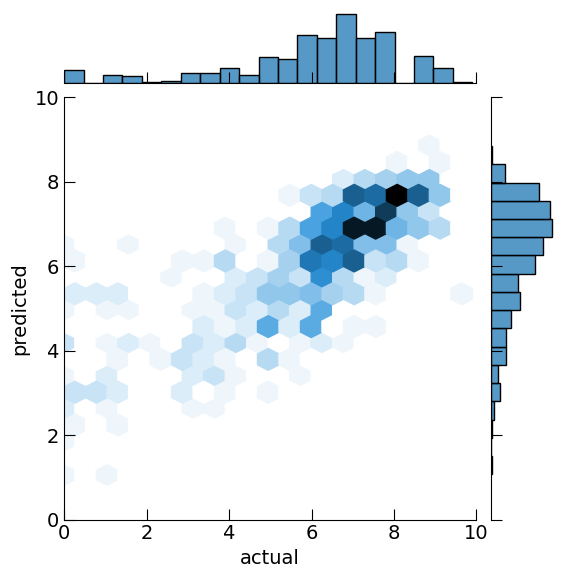

In [173]:
df_ensem_results = y_nw_prev_valid.to_frame(name='actual')
df_ensem_results['predicted'] = voting_reg.predict(X_nw_prev_valid)

sns.jointplot(data=df_ensem_results, x='actual', y='predicted', kind='hex')
plt.xlim(0,10);
plt.ylim(0,10);
plt.savefig('Hexbins_error_NW_model_ensemble.png', dpi=300, bbox_inches='tight')

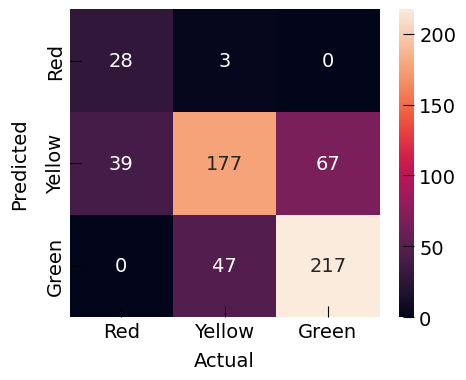

In [172]:
df_ensem_results['label'] = df_ensem_results.apply(lambda x: results(x), axis=1)
  
results_matrix = [[len(df_ensem_results.query("label == 'RR'")), len(df_ensem_results.query("label == 'YR'")), len(df_ensem_results.query("label == 'GR'"))],
                 [len(df_ensem_results.query("label == 'RY'")), len(df_ensem_results.query("label == 'YY'")), len(df_ensem_results.query("label == 'GY'"))],
                 [len(df_ensem_results.query("label == 'RG'")),len(df_ensem_results.query("label == 'YG'")), len(df_ensem_results.query("label == 'GG'"))]] 

#del plt.xlabel
#del plt.ylabel
#import matplotlib.pyplot as plt
#import seaborn as sns

fig, ax = plt.subplots(figsize=(5,4),)
sns.heatmap(results_matrix, annot=True, fmt='d', \
           xticklabels=['Red', 'Yellow', 'Green'],\
           yticklabels=['Red', 'Yellow', 'Green'])

plt.xlabel('Actual', labelpad = 7)
plt.ylabel('Predicted', labelpad = 12)
plt.savefig('pseudo_confusion_matrix_NW_model_ensemble.png', dpi=300, bbox_inches='tight')